In [10]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


# OPEN DATA FILE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# READ CSV DATA FILE

In [3]:
import pandas as pd
#BY USING PANDAS LIBRARY TO READ THE NON-HEADER DATAFILE
#NON-HEADER MEANS "FEATURES HAVE NO TITLES"
def read_data(path):
  data = pd.read_csv(path , header = None)
  return data

In [4]:
data = read_data('/content/drive/MyDrive/MAGIC04/magic04.csv')

#CONVERT DATA FRAME TO NUMPY ARRAY
data = data.to_numpy()
data.shape

(19020, 11)

# 1) Data Balancing


In [5]:
#ONLY TAKE DATA FOR 'G' CLASS TO BE EQAUL
#TO 'H' CLASS
#BY TAKING DATA FROM [:6688] FOR 'G' CLASS
#[1233:] FOR 'H' CLASS
def balance_data():
  _g_class_data = data[0:6688]
  _h_class_data = data[12333:]
  balanced_data = np.concatenate((_g_class_data , _h_class_data) , axis = 0)
  return balanced_data

In [6]:
b_data = balance_data()
np.random.shuffle(b_data)
b_data.shape

(13375, 11)

# 2)Data Split 


In [7]:
#SPLITING DATA INTO 30% TESTING SET
#70% TRAINIG SET
testing_set = b_data[0:4013]
training_set = b_data[4014:]

print(testing_set.shape)
print(training_set.shape)

(4013, 11)
(9361, 11)


In [8]:
#SPLIT TRUE LABELS FOR BOTH 
#TRAINIG SET ANS TESTING SET
testing_data_set = testing_set[:,0:-1]
testing_labels = testing_set[:,-1]

training_data_set = training_set[:,0:-1]
training_labels = training_set[:,-1]


# 3) a- Classification (KNN)

In [18]:
#APPLY KNN ALGORITHMS ON TRAINIG SET 
#FOR DIFF. K-VALUES TO GET HYPER PARAMETER TUNNING
#AND CHOOSE THE ONE GET THE BEST SCORE
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def KNN(training_data , training_labels):
  folds = KFold(n_splits=10 , shuffle=False , random_state=None)
  scores = []

  for k in range(1,35,2):
      score = 0
      for train_index , test_index in folds.split(training_data):
        _data_train , _data_validation = training_data[train_index] , training_data[test_index]
        _label_train , _label_validation = training_labels[train_index] , training_labels[test_index]
      
        knn = KNeighborsClassifier(n_neighbors= k ).fit(_data_train , _label_train)
        prediction = knn.predict(_data_validation)
        score = score + metrics.accuracy_score(_label_validation , prediction)
      scores.append(score / 10)

  loc = np.arange(1,35,step=2.0)
  plt.plot(range(1,35,2) , scores)
  plt.xticks(loc)
  plt.xlabel("K-values")
  plt.ylabel("Accuracy")
  plt.show()

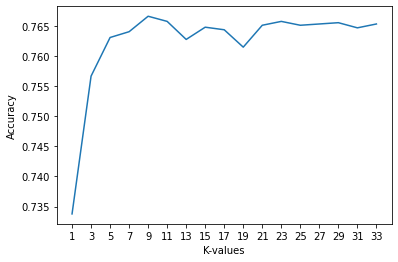

In [19]:
KNN(training_data_set , training_labels)